# Actividad de Ejemplo 1

La energía geotérmica se ha convertido en una fuente importante de energía.
Puesto que la cantidad de energía contenida en una cierta cantidad de agua es
función de su temperatura, un investigador se pregunta si el agua que se obtiene
de pozos más profundos contiene más energía.

Los siguientes datos fueron tomados de un artículo sobre sistemas geotérmicos:

| Profundidad del pozo en mts. | Temperatura del agua en°C |
|------------------------------|---------------------------|
| x                            | y                         |
| 600                          | 200                       |
| 650                          | 230                       |
| 700                          | 280                       |
| 800                          | 300                       |
| 800                          | 310                       |
| 1000                         | 350                       |
| 1000                         | 330                       |
| 1000                         | 360                       |
| 1500                         | 410                       |

1.- Obtenga el modelo de regresión lineal

In [1]:
prof_pozo <- c(600, 650, 700, 800, 800, 1000, 1000, 1000, 1500)
temp_agua <- c(200, 230, 280, 300, 310, 350, 330, 360, 410)
sist_geotem <- data.frame(prof_pozo, temp_agua)

#lm (y ~ x, data)
lm_sist_geotem <- lm(sist_geotem$temp_agua ~ sist_geotem$prof_pozo, data=sist_geotem)
# Esto me da el modelo de la recta
lm_sist_geotem
# Con esto me da todos los datos como en el excel
summary(lm_sist_geotem)


Call:
lm(formula = sist_geotem$temp_agua ~ sist_geotem$prof_pozo, data = sist_geotem)

Coefficients:
          (Intercept)  sist_geotem$prof_pozo  
             113.3764                 0.2173  



Call:
lm(formula = sist_geotem$temp_agua ~ sist_geotem$prof_pozo, data = sist_geotem)

Residuals:
   Min     1Q Median     3Q    Max 
-43.78 -24.65  12.75  19.28  29.28 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           113.37638   33.65544   3.369 0.011941 *  
sist_geotem$prof_pozo   0.21734    0.03615   6.013 0.000535 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 28.05 on 7 degrees of freedom
Multiple R-squared:  0.8378,	Adjusted R-squared:  0.8146 
F-statistic: 36.16 on 1 and 7 DF,  p-value: 0.0005353


La recta queda definida por:
$$ y = 113.3764 + 0.2173x $$

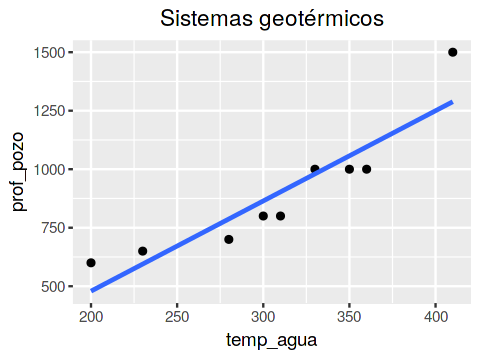

In [2]:
#Haciendo los gráficos:
#Escondemos mensajes para que no los imprima en el notebook
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(repr))

# Se cambia el tamaño del gráfico a 4x3 pulgadas
options(repr.plot.width=4, repr.plot.height=3)

mi_grafico <- sist_geotem %>%
  ggplot(aes(y=prof_pozo, x=temp_agua)) +
    ggtitle("Sistemas geotérmicos") +
    theme(plot.title = element_text(hjust = 0.5)) + # Para centrar título de la gráfica
    geom_point(stat="identity") +
    geom_smooth(method="lm" , se = FALSE) # Esto es para agregar la recta de regresión
    # se  = FALSE es para no mostrar el intervalo de confianza
plot(mi_grafico)

2.- Obtenga el coeficiente de correlación:

In [3]:
r <- cor(sist_geotem)
r

,prof_pozo,temp_agua
prof_pozo,1.0000000,0.9153116
temp_agua,0.9153116,1.0000000


3.- Pruebe la significancia:

$$ H_{0} : \text{El agua que se obtiene de pozos más profundos tiene menor o igual energía}$$
$$ H_{1} : \text{El agua que se obtiene de pozos más profundos tiene mayor energía}$$



In [4]:
r <- r[1,2]
n <- nrow(sist_geotem)     
t_calculado <- (r * sqrt(n - 2)) / sqrt(1 - (r^2))
print(paste("t calculado =", t_calculado))

[1] "t calculado = 6.0129326480908"


In [5]:
alfa_menor <- .025
alfa_mayor <- 1 - alfa_menor

t_tabla_menor <- qt(alfa_menor, df = n-1)
t_tabla_mayor <- qt(.025, df = n-1)

t_tabla_menor
t_tabla_mayor

[1] -2.306004

[1] 2.306004

De lo anterior se obtiene que

De lado izquierdo $ t_{calculado}\geq -2.36462425159278$ , <b>Se cumple</b>

Del lado derecho $ t_{calculado}\leq 2.36462425159278$, <b>No se cumple</b>

Por lo tanto del lado derecho cae en área de rechazo, y se rechaza $H_{0}$.

La hipótesis de que a mayor profundidad, el pozo contiene mayor energía <b>no se rechaza</b>

In [6]:
t.test(data=sist_geotem, x=temp_agua, y=prof_pozo)


	Welch Two Sample t-test

data:  temp_agua and prof_pozo
t = -6.2412, df = 8.8993, p-value = 0.0001586
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -799.6745 -373.6589
sample estimates:
mean of x mean of y 
 307.7778  894.4444 


In [7]:
?t.test